In [1]:
#Import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
file_name = 'palm_ffb.csv'
data = pd.read_csv(file_name)
data.head()  # To display first 5 rows of the data

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [3]:
# Use to check the shape of the data (rows, columns)
data.shape 

(130, 9)

In [4]:
data.describe()

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,527.646923,26.849918,21.379231,33.851538,188.980769,24.753846,793404.491565,1.602231
std,57.367844,0.651413,0.688971,1.079638,80.237210,1.239289,34440.893854,0.281751
min,380.700000,25.158065,18.900000,31.100000,2.000000,21.000000,683431.944400,1.080000
25%,488.625000,26.442285,21.000000,33.100000,140.300000,24.000000,768966.949100,1.390000
50%,538.300000,26.930645,21.500000,33.900000,182.150000,25.000000,790036.158050,1.585000
75%,571.025000,27.270726,21.800000,34.600000,226.100000,26.000000,821989.235250,1.807500
max,647.300000,28.580000,22.600000,36.000000,496.100000,27.000000,882254.225400,2.270000


In [5]:
missing_data = data.isnull()   ## To check whether the missing data exist or not
missing_data.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


In [6]:
for column in missing_data.columns.values.tolist():  # use For loop to check the missing data count in the column
    print(column)
    print (missing_data[column].value_counts())
    print("")

Date
False    130
Name: Date, dtype: int64

SoilMoisture
False    130
Name: SoilMoisture, dtype: int64

Average_Temp
False    130
Name: Average_Temp, dtype: int64

Min_Temp
False    130
Name: Min_Temp, dtype: int64

Max_Temp
False    130
Name: Max_Temp, dtype: int64

Precipitation
False    130
Name: Precipitation, dtype: int64

Working_days
False    130
Name: Working_days, dtype: int64

HA_Harvested
False    130
Name: HA_Harvested, dtype: int64

FFB_Yield
False    130
Name: FFB_Yield, dtype: int64



Summary:

1) In this dataset, there are total 130 samples and 9 variables

2) There is NO missing value in this dataset.

Now, we continue to explore the distribution of each attributes.

The numerical variables are ['SoilMoisture', 'Average_Temp', 'Min_Temp', 'Max_Temp', 'Precipitation', 'Working_days', 'HA_Harvested', 'FFB_Yield']


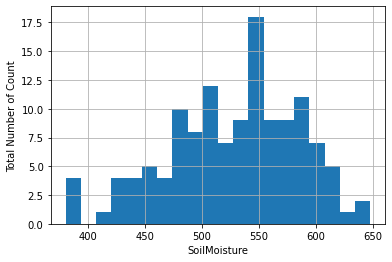

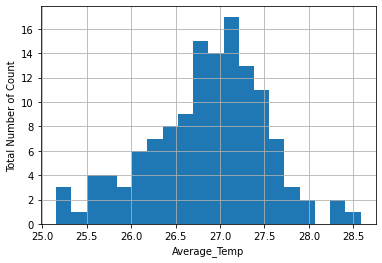

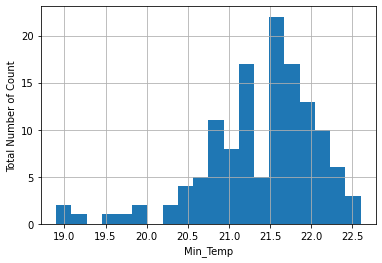

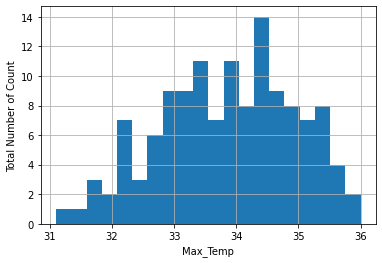

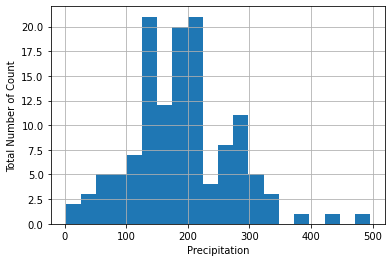

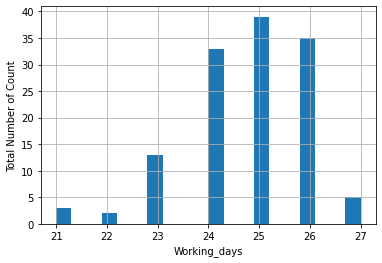

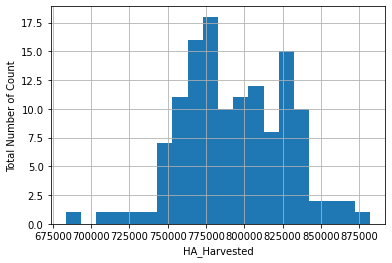

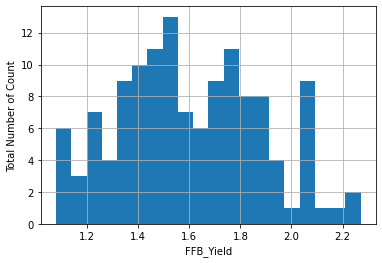

In [7]:
NumericalVariable = [var for var in data.columns if data[var].dtype !='O']  #if dtypes == 'O', it means there is a string or text in this variable

print("The numerical variables are", NumericalVariable)

def graph(df, variable):
    df = df.copy()
    df[variable].hist(bins = 20)
    plt.xlabel(variable)
    plt.ylabel("Total Number of Count")
    plt.show()

for variable in NumericalVariable:
    graph(data, variable)

Based on the histogram above, it shows that the attribute "min-temp" has a left skewed distribution.

Some Analysis about the Discrete Variables

In [8]:
DiscreteVariable = [var for var in data.columns if len(data[var].unique()) < 10]  #if unique value is less than 10, then we consider as discrete variable

print("The discrete variables are", DiscreteVariable)

The discrete variables are ['Working_days']


In [9]:
#To display the first five records for the variable "Working_days"
data[DiscreteVariable].head() 

,Working_days
0,25
1,23
2,25
3,25
4,25


In [10]:
#To display the descriptive statistics for variable "Working_days"
data[DiscreteVariable].describe()

,Working_days
count,130.000000
mean,24.753846
std,1.239289
min,21.000000
25%,24.000000
50%,25.000000
75%,26.000000
max,27.000000


C:\Users\Z\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


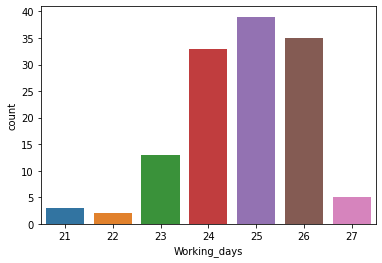

In [11]:
y = data["FFB_Yield"]
x = data["Working_days"]
sns.countplot(x, data=data)
plt.show()

Based on the chart above, it shows that maximum yields occur when there are 25 working days.

Now, let's proceed to check the relationship between the target variable (FFB_Yield) and independent variables.

In [12]:
# To display the correlation matrix 
correlation = data.corr()
correlation

,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
SoilMoisture,1.000000,-0.649878,0.015839,-0.499936,0.552001,-0.057015,-0.326539,-0.003183
Average_Temp,-0.649878,1.000000,0.180396,0.761083,-0.369386,0.076321,0.446515,-0.005494
Min_Temp,0.015839,0.180396,1.000000,-0.124754,0.345944,0.068414,0.024396,0.103830
Max_Temp,-0.499936,0.761083,-0.124754,1.000000,-0.461117,-0.039112,0.314827,-0.071201
Precipitation,0.552001,-0.369386,0.345944,-0.461117,1.000000,0.127897,-0.265866,0.289604
Working_days,-0.057015,0.076321,0.068414,-0.039112,0.127897,1.000000,0.048876,0.116364
HA_Harvested,-0.326539,0.446515,0.024396,0.314827,-0.265866,0.048876,1.000000,-0.350222
FFB_Yield,-0.003183,-0.005494,0.103830,-0.071201,0.289604,0.116364,-0.350222,1.000000


<AxesSubplot:>

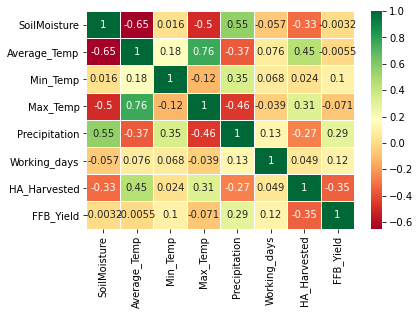

In [13]:
sns.heatmap(correlation, annot=True,cmap='RdYlGn',linewidths=0.5)

In [14]:
correlation["FFB_Yield"].sort_values()

HA_Harvested    -0.350222
Max_Temp        -0.071201
Average_Temp    -0.005494
SoilMoisture    -0.003183
Min_Temp         0.103830
Working_days     0.116364
Precipitation    0.289604
FFB_Yield        1.000000
Name: FFB_Yield, dtype: float64

Based on the heatmap above, it shows that FFB_Yield is negatively correlated with HA_Harvested, and positive relationship with Min_Temp, Workings_days, and Precipitation. 

Next, let's perform the feature selection to select the significant features in this dataset. There are three types of feature selection such as filter method, wrapper method and embedded method.

Feature selection helps to reduce overfitting problem, improves accuracy, and reduce training times.

We have performed the filter method above which are correlation matrix and heatmap.


In [42]:

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np


In [43]:

X = data.drop(['FFB_Yield','Date'],axis=1)  #independent columns
y = data.FFB_Yield    #target column i.e FFB_Yield

               Importance
HA_Harvested     0.401089
Precipitation    0.202245
Average_Temp     0.089838
Max_Temp         0.088009
Working_days     0.087854
SoilMoisture     0.082905
Min_Temp         0.048060


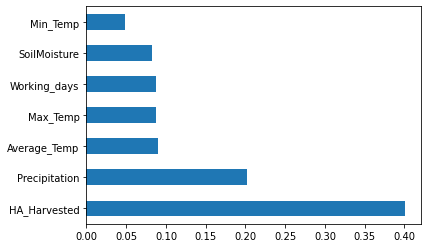

In [44]:
xgb = XGBRegressor()
xgb.fit(X, y)
imp = pd.DataFrame(xgb.feature_importances_ ,columns = ['Importance'],index = X.columns) #construct a new DataFrame with feature importance
imp = imp.sort_values(['Importance'], ascending = False)
print(imp)

feat_importances = pd.Series(xgb.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh') #return the first n rows ordered by columns in descending order.
plt.show()


According to the XBGRegressor, it shows that HA_Harvested, Precipitation, and Average_Temp are the most three significant features in this dataset. 

This result almost same as correlation method. Based on these two methods, HA_Harvested, Precipitation, and Average_Temp are the best features to use to build the model.

Now, let's train the model with the selected features to check for acccuracy. Linear Regression was selected to train the model as the target variable is numerical data type.

In [45]:
#split the data into 70% of training data and 30% of test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [46]:
model = LinearRegression()  
model.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [47]:
y_pred = model.predict(X_test)
y_pred

array([1.59077331, 1.79225023, 1.58635269, 1.6319931 , 1.66263915,
       1.69517612, 1.63677321, 1.61944411, 1.61555335, 1.6026888 ,
       1.43320665, 1.70942322, 1.59876309, 1.68901185, 1.65023955,
       1.48395474, 1.57536487, 1.72031202, 1.54499884, 1.80784849,
       1.49315501, 1.73329381, 1.50868102, 1.47581288, 1.58230782,
       1.55502459, 1.39534252, 1.60849279, 1.62424399, 1.50971179,
       1.51028068, 1.59014755, 1.49901572, 1.61084281, 1.65002197,
       1.69863177, 1.63242406, 1.72596462, 1.58347253])

In [48]:
# importing r2_score module
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# predicting the accuracy score
score=r2_score(y_test,y_pred)
print("r2 score is",score)
print("mean_sqrd_error is",mean_squared_error(y_test,y_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y_test,y_pred)))

r2 score is 0.21475876351816603
mean_sqrd_error is 0.07102390824031962
root_mean_squared error of is 0.2665031111269053


The model above trained with all the features. The accuracy score only 21.48%. So, we will train the model with the selected features according to the feature importance now.

In [63]:
X1 = data[['HA_Harvested','Precipitation']] 
y1 = data["FFB_Yield"]   


In [64]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [65]:
model = LinearRegression()  
model.fit(X1_train, y1_train) #training the algorithm

LinearRegression()

In [66]:
y1_pred = model.predict(X1_test)
y1_pred

array([1.59383671, 1.78138712, 1.61507958, 1.59692196, 1.64567663,
       1.6095352 , 1.65653681, 1.60247927, 1.54474133, 1.54005876,
       1.51915543, 1.67532667, 1.68101608, 1.64662678, 1.70710484,
       1.60541154, 1.54116197, 1.58920188, 1.67074253, 1.68513464,
       1.52398164, 1.64646145, 1.50301052, 1.52481827, 1.5385606 ,
       1.58060581, 1.53886692, 1.64940836, 1.56710113, 1.49978078,
       1.51298642, 1.69989045, 1.56915203, 1.52795081, 1.58281306,
       1.6984884 , 1.55766415, 1.66901333, 1.6484598 ])

In [67]:
# predicting the accuracy score
score1=r2_score(y1_test,y1_pred)
print("r2 score is",score1)
print("mean_sqrd_error is",mean_squared_error(y1_test,y1_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y1_test,y1_pred)))

r2 score is 0.2290898738142716
mean_sqrd_error is 0.06972768051390418
root_mean_squared error of is 0.2640599941564496


The trained model with selected features (HA_Harvested, Precipitation) has an accuracy score of 22.91%. The accuracy has improved a little bit and the mean square error had decreased. 

Now, the model will be trained based on three selected features (HA_Harvested, Precipitation, Average_Temp).

In [68]:
X2 = X = data[['HA_Harvested','Precipitation', 'Average_Temp']] 
y2 = data["FFB_Yield"]
X2   

,HA_Harvested,Precipitation,Average_Temp
0,777778.3951,184.4,25.306452
1,767988.2759,140.2,26.165517
2,783951.9231,280.4,25.448387
3,788987.0504,173.3,26.903333
4,813659.7222,140.6,27.241935
...,...,...,...
125,820758.9147,165.6,27.213333
126,882254.2254,154.7,27.074194
127,829488.8199,127.2,27.016129
128,792101.0471,180.6,26.946667


In [69]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [71]:
model2 = LinearRegression()  
model2.fit(X2_train, y2_train) #training the algorithm

LinearRegression()

In [72]:
y2_pred = model2.predict(X2_test)
y2_pred

array([1.65654644, 1.77495504, 1.64840429, 1.67742508, 1.62677177,
       1.63551082, 1.67347534, 1.64475213, 1.58650115, 1.56086343,
       1.49500039, 1.73488544, 1.64559754, 1.72969073, 1.73501321,
       1.54198938, 1.55277705, 1.60359577, 1.56939167, 1.79870847,
       1.55560949, 1.65866353, 1.41516339, 1.49942748, 1.48890636,
       1.60627289, 1.49982963, 1.63862707, 1.5714677 , 1.53302111,
       1.50573074, 1.63162661, 1.54517929, 1.52939559, 1.58119802,
       1.70706057, 1.59673322, 1.68260817, 1.68728854])

In [73]:
score2=r2_score(y2_test,y2_pred)
print("r2 score is",score2)
print("mean_sqrd_error is",mean_squared_error(y2_test,y2_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y2_test,y2_pred)))

r2 score is 0.3141838277769843
mean_sqrd_error is 0.06203105825660693
root_mean_squared error of is 0.24906035063134183


The trained model with selected features (HA_Harvested, Precipitation, Average_Temp) has an accuracy score of 31.42%. The accuracy has improved around 10% and the mean square error had decreased.

Now, the model will be trained with four selected features (HA_Harvested, Precipitation, Average_Temp, Max_Temp) based on feature importance by XGBRegressor

In [74]:
X3 = X = data[['HA_Harvested','Precipitation', 'Average_Temp','Max_Temp']] 
y3 = data["FFB_Yield"]
X3   

,HA_Harvested,Precipitation,Average_Temp,Max_Temp
0,777778.3951,184.4,25.306452,32.2
1,767988.2759,140.2,26.165517,35.1
2,783951.9231,280.4,25.448387,32.9
3,788987.0504,173.3,26.903333,34.8
4,813659.7222,140.6,27.241935,35.0
...,...,...,...,...
125,820758.9147,165.6,27.213333,33.6
126,882254.2254,154.7,27.074194,33.5
127,829488.8199,127.2,27.016129,33.6
128,792101.0471,180.6,26.946667,34.2


In [75]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

In [76]:
model3 = LinearRegression()  
model3.fit(X3_train, y3_train) #training the algorithm

LinearRegression()

In [77]:
y3_pred = model3.predict(X3_test)
y3_pred

array([1.62408528, 1.82021   , 1.59804006, 1.64303813, 1.71398622,
       1.66714068, 1.6125627 , 1.59235849, 1.58556272, 1.4983774 ,
       1.47331648, 1.68719354, 1.6074992 , 1.67139667, 1.636912  ,
       1.52191024, 1.60404483, 1.70105139, 1.49401789, 1.77668002,
       1.520036  , 1.72885163, 1.52808862, 1.51683259, 1.51510897,
       1.56043077, 1.49275869, 1.59769628, 1.57677041, 1.54483634,
       1.50241237, 1.52625789, 1.4877075 , 1.56158703, 1.62832377,
       1.68598635, 1.65884491, 1.68463143, 1.71168514])

In [78]:
score3=r2_score(y3_test,y3_pred)
print("r2 score is",score3)
print("mean_sqrd_error is",mean_squared_error(y3_test,y3_pred))
print("root_mean_squared error of is",np.sqrt(mean_squared_error(y3_test,y3_pred)))

r2 score is 0.1906604099831951
mean_sqrd_error is 0.07320356866910577
root_mean_squared error of is 0.2705615801792741


Summary:

From the XGBRegressor, the feature importance are rank from highest to lowest which shows in the list below:

1) HA_Harvested     0.401089

2) Precipitation    0.202245

3) Average_Temp     0.089838

4) Max_Temp         0.088009

5) Working_days     0.087854

6) SoilMoisture     0.082905

7) Min_Temp         0.048060

From the list above, we know that the three most important features are HA_Harvested, Precipitation, Average_Temp.

Firstly, the trained model with full features only have an accuracy of 21.48%. I have tried one by one in order to select the best features with highest accuracy.

Then, I started to train the model with two selected features (HA_Harvested, Precipitation), it has an accuracy score of 22.91%. The accuracy has improved a little bit and the mean square error had decreased.

Next, trained the model with three selected features (HA_Harvested, Precipitation, Average_Temp), it has an accuracy of 31.42%. The accuracy has improved and the mean square error had decreased.

Lastly, trained the model with four selected features (HA_Harvested, Precipitation, Average_Temp, Max_Temp). The accuracy has drop from 31.42% (3 selected features) to 19.07%.

As a conclusion, three selected features (HA_Harvested, Precipitation, Average_Temp) have the highest accuracy, therefore they are the most significant features for this dataset!!!